In [145]:
import requests
import json
import re
import pandas as pd
import sklearn
import os
import nltk
import string
import numpy as np
import matplotlib.pyplot as plt
import wordcloud
import random
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup 
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.decomposition import LatentDirichletAllocation 
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.decomposition import PCA
from IPython.display import clear_output
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [146]:
def biplot(PCA_dataset, EVectors_as_columns, labels=feature_names):
    xs = PCA_dataset[:, 0]
    ys = PCA_dataset[:, 1]
    n = EVectors_as_columns.shape[0]
   
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    
    plt.scatter(xs*scalex, ys*scaley, cmap ="cool", s = 10, c = labels_num, alpha = 0.7)
              
    for i in range(len(feature_names)):
        plt.arrow(0, 0, EVectors_as_columns[i, 0], EVectors_as_columns[i, 1], color='black')
        if labels is None:
            plt.text(EVectors_as_columns[i, 0] * 1.07 , EVectors_as_columns[i, 1] * 1.07, 
                     "Var" + str(i + 1), color='black', ha='center', va='center')
        else:
            plt.text(EVectors_as_columns[i, 0] * 1.07, 
                     EVectors_as_columns[i, 1] * 1.07, labels[i], color='black', 
                     ha='center', va='center')

# PCA Song titles

In [147]:
########## Prepare data ##########
titles = pd.read_csv("lennon_mccartney_clean.csv")
unlabeled_titles = titles.drop('LABEL', axis=1)
labels = titles["LABEL"]
my_dict = {"paul":0, "john":1}
labels_num = labels.map(my_dict)

# Standardize data
scaler = StandardScaler() ##Instantiate
unlabeled_titles_stand = scaler.fit_transform(unlabeled_titles) ## Scale data

In [199]:
########## Perform PCA ###########
## Instantiate PCA and choose how many components
MyPCA = PCA(n_components = 10)

# Project the original data into the PCA space
Result = MyPCA.fit_transform(unlabeled_titles_stand)
# print("Result: \n", Result)

# Get eigenvectors and eigenvalues
Evals = MyPCA.explained_variance_
Evects = MyPCA.components_
# print("Eigenvalues: \n", Evals)
# print("Eigenvectors: \n", Evects.T)
print("The relative eigenvalues are: \n", MyPCA.explained_variance_ratio_, "\n")
# print("Percentage of the variation in first 5 eigenvalues: \n", sum(MyPCA.explained_variance_ratio_[0:5])*100)

###############################################
## Create a DF of the most important features
##################################################
feature_names = ["paul", "john"]

first_eigenvect = MyPCA.components_[0]

# Get indices of first 4 max values
most_important = np.argsort(first_eigenvect)[::-1][0:3]

The relative eigenvalues are: 
 [0.13097084 0.04770385 0.04056738 0.04027428 0.03900623 0.0388813
 0.03633913 0.03398942 0.0308118  0.02983671] 



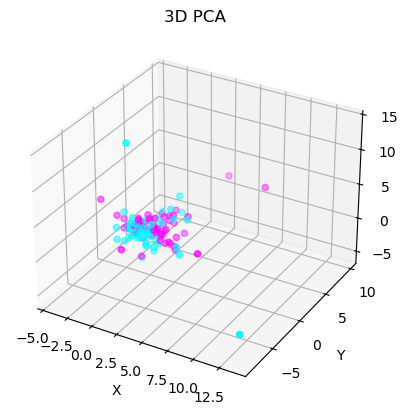

In [190]:
fig2 = plt.figure()
    #figsize=(12, 12))
ax2 = fig2.add_subplot(projection='3d')
#Axes3D(fig2, rect=[0, 0, .90, 1], elev=48, azim=134)

x=Result[:,0]
y=Result[:,1] 
z=Result[:,2]
#print(y)

ax2.scatter(x,y,z, cmap="cool", s = 20, c=labels_num)
#surf2 = ax2.plot_surface(x, y, z, cmap='viridis')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('3D PCA')
#
plt.show()

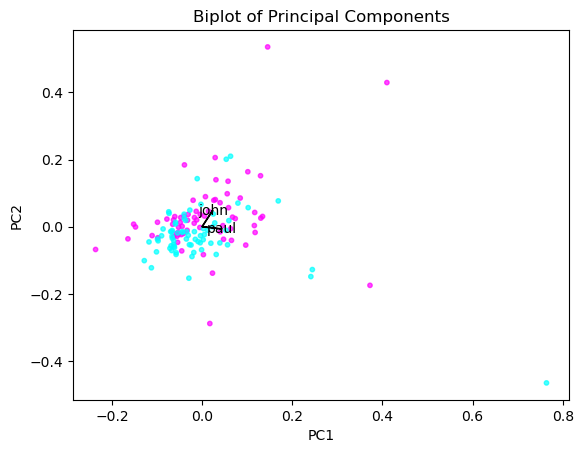

In [191]:
feature_names = ['paul', 'john']
# Plot biplot
#plt.figure(figsize=(10, 10))
biplot(Result, Evects.T, labels=feature_names)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot of Principal Components')
plt.show()

# Lyrics
## Only stopwords

In [152]:
########## Prepare data ##########
lyrics_count100 = pd.read_csv("paul_john_lyrics_corpus_count100.csv")
unlabeled_lyrics_count100 = lyrics_count100.drop('LABEL', axis=1)
labels = lyrics_count100["LABEL"]
my_dict = {"McCartney":0, "Lennon":1}
labels_num = labels.map(my_dict)

# Standardize data
scaler = StandardScaler() ##Instantiate
unlabeled_lyrics_count100_stand = scaler.fit_transform(unlabeled_lyrics_count100) ## Scale data

In [192]:
########## Perform PCA ###########
## Instantiate PCA and choose how many components
MyPCA = PCA(n_components = 3)

# Project the original data into the PCA space
Result = MyPCA.fit_transform(unlabeled_lyrics_count100_stand)
# print("Result: \n", Result)

# Get eigenvectors and eigenvalues
Evals = MyPCA.explained_variance_
Evects = MyPCA.components_
# print("Eigenvalues: \n", Evals)
# print("Eigenvectors: \n", Evects.T)
# print("The relative eigenvalues are: \n", MyPCA.explained_variance_ratio_, "\n")
# print("Percentage of the variation in first 5 eigenvalues: \n", sum(MyPCA.explained_variance_ratio_[0:5])*100)

###############################################
## Create a DF of the most important features
##################################################
feature_names = ["McCartney", "Lennon"]

first_eigenvect = MyPCA.components_[0]

# Get indices of first 4 max values
most_important = np.argsort(first_eigenvect)[::-1][0:3]

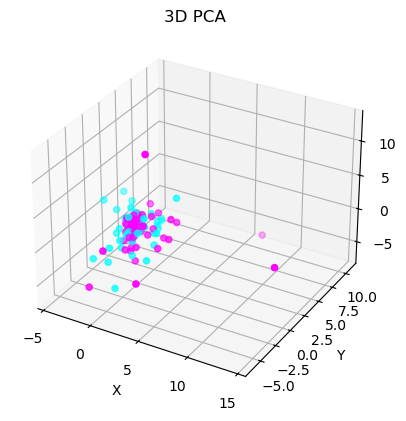

In [193]:
fig2 = plt.figure()
    #figsize=(12, 12))
ax2 = fig2.add_subplot(projection='3d')
#Axes3D(fig2, rect=[0, 0, .90, 1], elev=48, azim=134)

x=Result[:,0]
y=Result[:,1] 
z=Result[:,2]
#print(y)

ax2.scatter(x,y,z, cmap="cool", s = 20, c=labels_num)
#surf2 = ax2.plot_surface(x, y, z, cmap='viridis')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('3D PCA')
#
plt.show()

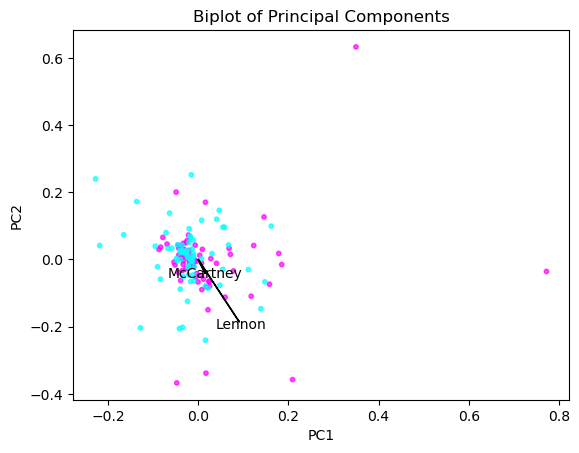

In [155]:
feature_names = ['McCartney', 'Lennon']
# Plot biplot
#plt.figure(figsize=(10, 10))
biplot(Result, Evects.T, labels=feature_names)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot of Principal Components')
plt.show()

## LEM

In [156]:
########## Prepare data ##########
lyrics_lem100 = pd.read_csv("paul_john_lyrics_corpus_lem_count100.csv")
unlabeled_lyrics_lem100 = lyrics_lem100.drop('Label', axis=1)
labels = lyrics_lem100["Label"]
my_dict = {"McCartney":0, "Lennon":1}
labels_num = labels.map(my_dict)

# Standardize data
scaler = StandardScaler() ##Instantiate
unlabeled_lyrics_lem100_stand = scaler.fit_transform(unlabeled_lyrics_lem100) ## Scale data

In [157]:
########## Perform PCA ###########
## Instantiate PCA and choose how many components
MyPCA = PCA(n_components = 3)

# Project the original data into the PCA space
Result = MyPCA.fit_transform(unlabeled_lyrics_lem100_stand)
# print("Result: \n", Result)

# Get eigenvectors and eigenvalues
Evals = MyPCA.explained_variance_
Evects = MyPCA.components_
# print("Eigenvalues: \n", Evals)
# print("Eigenvectors: \n", Evects.T)
# print("The relative eigenvalues are: \n", MyPCA.explained_variance_ratio_, "\n")
# print("Percentage of the variation in first 5 eigenvalues: \n", sum(MyPCA.explained_variance_ratio_[0:5])*100)

###############################################
## Create a DF of the most important features
##################################################
feature_names = ["McCartney", "Lennon"]

first_eigenvect = MyPCA.components_[0]

# Get indices of first 4 max values
most_important = np.argsort(first_eigenvect)[::-1][0:3]

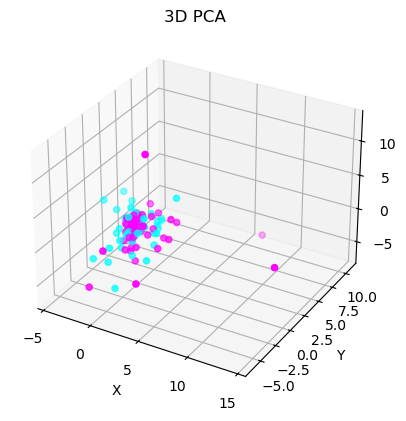

In [194]:
fig2 = plt.figure()
    #figsize=(12, 12))
ax2 = fig2.add_subplot(projection='3d')
#Axes3D(fig2, rect=[0, 0, .90, 1], elev=48, azim=134)

x=Result[:,0]
y=Result[:,1] 
z=Result[:,2]
#print(y)

ax2.scatter(x,y,z, cmap="cool", s = 20, c=labels_num)
#surf2 = ax2.plot_surface(x, y, z, cmap='viridis')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('3D PCA')
#
plt.show()

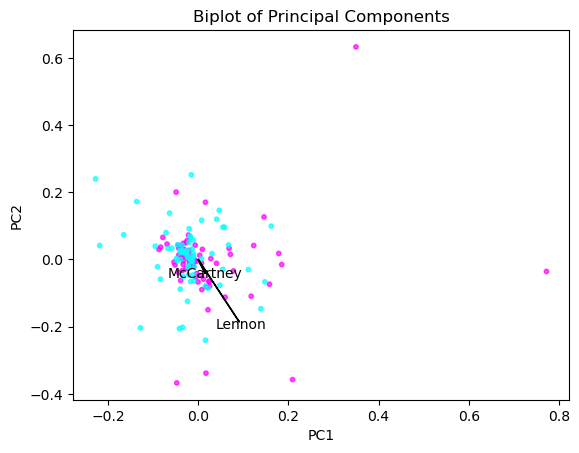

In [195]:
feature_names = ['McCartney', 'Lennon']
# Plot biplot
#plt.figure(figsize=(10, 10))
biplot(Result, Evects.T, labels=feature_names)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot of Principal Components')
plt.show()

## STEM

In [160]:
########## Prepare data ##########
lyrics_stem100 = pd.read_csv("paul_john_lyrics_corpus_stem_count100.csv")
unlabeled_lyrics_stem100 = lyrics_stem100.drop('Label', axis=1)
labels = lyrics_stem100["Label"]
my_dict = {"McCartney":0, "Lennon":1}
labels_num = labels.map(my_dict)

# Standardize data
scaler = StandardScaler() ##Instantiate
unlabeled_lyrics_stem100_stand = scaler.fit_transform(unlabeled_lyrics_stem100) ## Scale data

In [161]:
########## Perform PCA ###########
## Instantiate PCA and choose how many components
MyPCA = PCA(n_components = 3)

# Project the original data into the PCA space
Result = MyPCA.fit_transform(unlabeled_lyrics_stem100_stand)
# print("Result: \n", Result)

# Get eigenvectors and eigenvalues
Evals = MyPCA.explained_variance_
Evects = MyPCA.components_
# print("Eigenvalues: \n", Evals)
# print("Eigenvectors: \n", Evects.T)
# print("The relative eigenvalues are: \n", MyPCA.explained_variance_ratio_, "\n")
# print("Percentage of the variation in first 5 eigenvalues: \n", sum(MyPCA.explained_variance_ratio_[0:5])*100)

###############################################
## Create a DF of the most important features
##################################################
feature_names = ["McCartney", "Lennon"]

first_eigenvect = MyPCA.components_[0]

# Get indices of first 4 max values
most_important = np.argsort(first_eigenvect)[::-1][0:3]

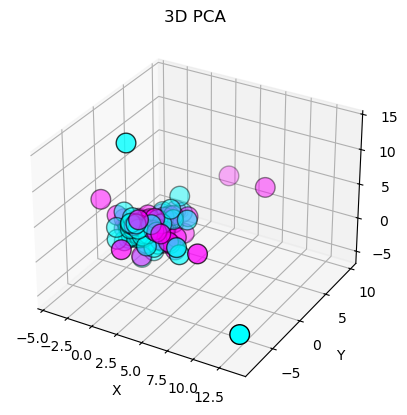

In [162]:
fig2 = plt.figure()
    #figsize=(12, 12))
ax2 = fig2.add_subplot(projection='3d')
#Axes3D(fig2, rect=[0, 0, .90, 1], elev=48, azim=134)

x=Result[:,0]
y=Result[:,1] 
z=Result[:,2]
#print(y)

ax2.scatter(x,y,z, cmap="cool", edgecolor='k', s=10, c=labels_num)
#surf2 = ax2.plot_surface(x, y, z, cmap='viridis')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('3D PCA')
#
plt.show()

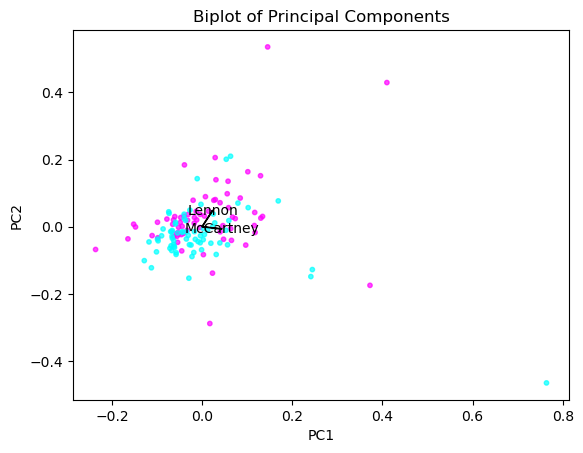

In [163]:
feature_names = ['McCartney', 'Lennon']
# Plot biplot
#plt.figure(figsize=(10, 10))
biplot(Result, Evects.T, labels=feature_names)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot of Principal Components')
plt.show()